In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

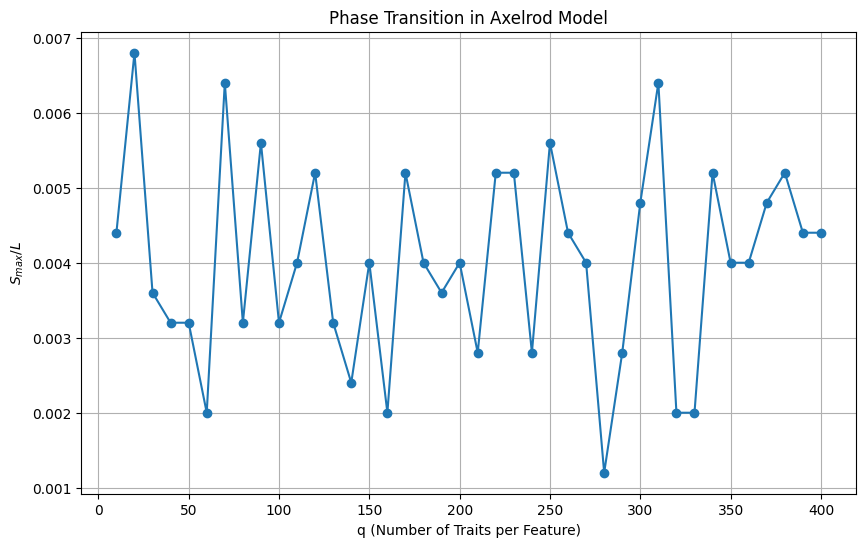

In [2]:
# Parameters of the Axelrod model
grid_size = 50
F = 3
noise = 0.01  # probability of random cultural drift
media = 0.01  # probability of adopting the global culture

def initialize_network(grid_size, F, q):
    G = nx.grid_2d_graph(grid_size, grid_size, periodic=True)
    for _, data in G.nodes(data=True):
        data['culture'] = np.random.randint(q, size=F)
    return G

def calculate_global_culture(culture_grid, q):
    L, _, F = culture_grid.shape
    culture_int = np.sum(culture_grid * (q ** np.arange(F)), axis=2)
    unique_vals, counts = np.unique(culture_int, return_counts=True)
    most_common_culture_int = unique_vals[np.argmax(counts)]
    most_common_culture = np.zeros(F)
    for i in range(F-1, -1, -1):
        most_common_culture[i] = most_common_culture_int % q
        most_common_culture_int //= q
    return most_common_culture

def axelrod_step(G, F, q, noise, media, global_culture):
    node = np.random.choice([str(n) for n in G.nodes()])
    node = eval(node)
    culture = G.nodes[node]['culture']
    neighbors = [str(n) for n in G.neighbors(node)]
    neighbor = eval(np.random.choice(neighbors))
    neighbor_culture = G.nodes[neighbor]['culture']
    if any(culture == neighbor_culture):
        differing_features = np.where(culture != neighbor_culture)[0]
        if len(differing_features) > 0:
            f = np.random.choice(differing_features)
            culture[f] = neighbor_culture[f]
            G.nodes[node]['culture'] = culture
    if np.random.rand() < noise:
        f = np.random.randint(F)
        culture[f] = np.random.randint(q)
        G.nodes[node]['culture'] = culture
    if np.random.rand() < media:
        G.nodes[node]['culture'] = global_culture
    return G

def calculate_Smax_norm(G, F, q, grid_size):
    cultures = np.array([list(node_data["culture"]) for node, node_data in G.nodes(data=True)])
    culture_int = np.sum(cultures * (q ** np.arange(F)), axis=1)
    unique_vals, counts = np.unique(culture_int, return_counts=True)
    max_count = np.max(counts)
    Smax_norm = max_count / (grid_size ** 2)
    return Smax_norm

# Simulation parameters
num_steps_reduced = 1000
q_values = np.arange(10, 401, 10)
Smax_norm_values_reduced = []

for q_val in q_values:
    G = initialize_network(grid_size, F, q_val)
    global_culture = calculate_global_culture(np.array([list(node_data["culture"]) for node, node_data in G.nodes(data=True)]).reshape(grid_size, grid_size, F), q_val)
    for _ in range(num_steps_reduced):
        G = axelrod_step(G, F, q_val, noise, media, global_culture)
    Smax_norm_values_reduced.append(calculate_Smax_norm(G, F, q_val, grid_size))

plt.figure(figsize=(10, 6))
plt.plot(q_values, Smax_norm_values_reduced, marker='o', linestyle='-')
plt.xlabel("q (Number of Traits per Feature)")
plt.ylabel("$S_{max}/L$")
plt.title("Phase Transition in Axelrod Model")
plt.grid(True)
plt.show()

100%|██████████| 40/40 [8:41:50<00:00, 782.75s/it]  


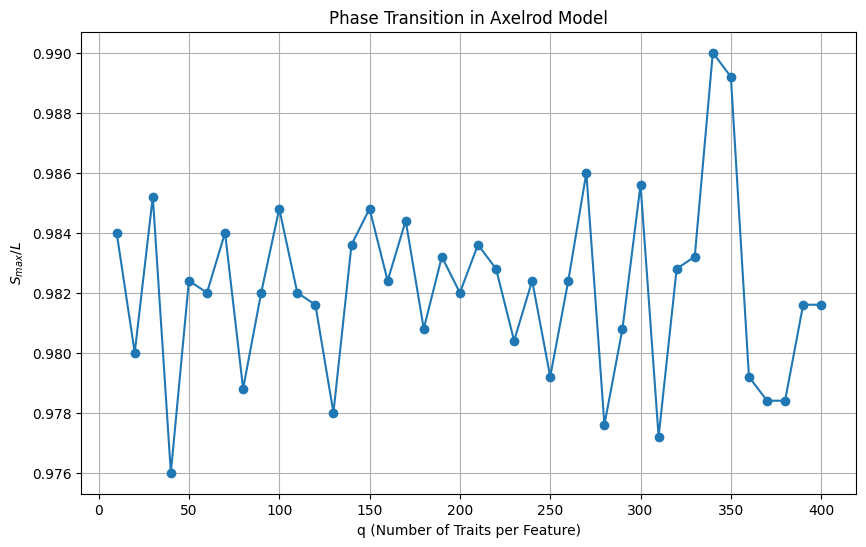

In [5]:
# Parameters of the Axelrod model
grid_size = 50
F = 3
noise = 0.01  # probability of random cultural drift
media = 0.01  # probability of adopting the global culture

def initialize_network(grid_size, F, q):
    G = nx.grid_2d_graph(grid_size, grid_size, periodic=True)
    for _, data in G.nodes(data=True):
        data['culture'] = np.random.randint(q, size=F)
    return G

def calculate_global_culture(culture_grid, q):
    L, _, F = culture_grid.shape
    culture_int = np.sum(culture_grid * (q ** np.arange(F)), axis=2)
    unique_vals, counts = np.unique(culture_int, return_counts=True)
    most_common_culture_int = unique_vals[np.argmax(counts)]
    most_common_culture = np.zeros(F)
    for i in range(F-1, -1, -1):
        most_common_culture[i] = most_common_culture_int % q
        most_common_culture_int //= q
    return most_common_culture

def axelrod_step(G, F, q, noise, media, global_culture):
    node = np.random.choice([str(n) for n in G.nodes()])
    node = eval(node)
    culture = G.nodes[node]['culture']
    neighbors = [str(n) for n in G.neighbors(node)]
    neighbor = eval(np.random.choice(neighbors))
    neighbor_culture = G.nodes[neighbor]['culture']
    if any(culture == neighbor_culture):
        differing_features = np.where(culture != neighbor_culture)[0]
        if len(differing_features) > 0:
            f = np.random.choice(differing_features)
            culture[f] = neighbor_culture[f]
            G.nodes[node]['culture'] = culture
    if np.random.rand() < noise:
        f = np.random.randint(F)
        culture[f] = np.random.randint(q)
        G.nodes[node]['culture'] = culture
    if np.random.rand() < media:
        G.nodes[node]['culture'] = global_culture
    return G

def calculate_Smax_norm(G, F, q, grid_size):
    cultures = np.array([list(node_data["culture"]) for node, node_data in G.nodes(data=True)])
    culture_int = np.sum(cultures * (q ** np.arange(F)), axis=1)
    unique_vals, counts = np.unique(culture_int, return_counts=True)
    max_count = np.max(counts)
    Smax_norm = max_count / (grid_size ** 2)
    return Smax_norm

# Simulation parameters
num_steps_reduced = 1000000
q_values = np.arange(10, 401, 10)
Smax_norm_values_reduced = []

for q_val in tqdm(q_values):
    G = initialize_network(grid_size, F, q_val)
    global_culture = calculate_global_culture(np.array([list(node_data["culture"]) for node, node_data in G.nodes(data=True)]).reshape(grid_size, grid_size, F), q_val)
    for _ in range(num_steps_reduced):
        G = axelrod_step(G, F, q_val, noise, media, global_culture)
    Smax_norm_values_reduced.append(calculate_Smax_norm(G, F, q_val, grid_size))

plt.figure(figsize=(10, 6))
plt.plot(q_values, Smax_norm_values_reduced, marker='o', linestyle='-')
plt.xlabel("q (Number of Traits per Feature)")
plt.ylabel("$S_{max}/L$")
plt.title("Phase Transition in Axelrod Model")
plt.grid(True)
plt.show()